### Importar librerias

In [141]:
import pandas as pd 
import numpy as np 
import random
import matplotlib.pyplot as plt 
from scipy.stats import truncnorm

In [142]:
df = pd.read_csv('vgsales.csv')

In [143]:
df.head(5)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [144]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### Eliminacion de columnas que no nos serviran para el analis (Id, nombres)

In [145]:
df.columns = ['rank', 'name', 'platform', 'year', 'genre', 'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']

In [146]:
df = df.loc[:, ['platform', 'publisher', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']]

In [147]:
df = df[df['publisher'].isin(['Nintendo', 'Activision', 'Ubisoft'])]
df = df[df['platform'].isin(['Wii',
 'NES',
 'GBA',
 'X360',
 '3DS',
 'PS4',
 'PS3',
 'N64',
 'WiiU',
 'PC',
 'PS',
 'PS2',
 'PSP',])]


df.shape[0]

1729

### Separamos las columnas Categoricas y las numericas

In [148]:
num_cols = []
for i in df.columns:
    if df[i].dtypes == 'int64' or df[i].dtypes == 'float64':
        num_cols.append( i )
num_cols

['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']

In [149]:
cat_cols = []
for i in df.columns:
    if df[i].dtypes == 'O':
        cat_cols.append( i )
cat_cols

['platform', 'publisher']

In [150]:
df.describe()

,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,1729.000000,1729.000000,1729.000000,1729.000000,1729.000000
mean,0.585240,0.326946,0.141718,0.096385,1.150567
std,1.830732,1.072206,0.491401,0.314340,3.379884
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.070000,0.020000,0.000000,0.010000,0.130000
50%,0.180000,0.080000,0.000000,0.020000,0.330000
75%,0.470000,0.250000,0.030000,0.070000,0.930000
max,41.490000,29.020000,6.810000,8.460000,82.740000


In [151]:
# -------------------------------
#  ESTADÍSTICAS DEL DATASET COMPLETO 
# -------------------------------
print(" ESTADÍSTICAS DEL DATASET COMPLETO ")
print(df['global_sales'].describe())
# -------------------------------
# ANÁLISIS POR 'pulisher' para tratar de verificar que tan bien o mal esta simulado el dataset
# -------------------------------

print("\n------------------------------------------------------------")
print("\n ANÁLISIS POR 'publisher' ")
print(" ESTADÍSTICAS PARA 'Nintendo' EN 'publisher'")
print(df[df['publisher'] == 'Nintendo']['global_sales'].describe())


print("\n------------------------------------------------------------")
print(" ESTADÍSTICAS PARA 'activision' EN 'publisher'")
print(df[df['publisher'] == 'Activision']['global_sales'].describe())


print("\n------------------------------------------------------------")
print(" ESTADÍSTICAS PARA 'Ubisoft' EN 'publisher'")
print(df[df['publisher'] == 'Ubisoft']['global_sales'].describe())


 ESTADÍSTICAS DEL DATASET COMPLETO 
count    1729.000000
mean        1.150567
std         3.379884
min         0.010000
25%         0.130000
50%         0.330000
75%         0.930000
max        82.740000
Name: global_sales, dtype: float64

------------------------------------------------------------

 ANÁLISIS POR 'publisher' 
 ESTADÍSTICAS PARA 'Nintendo' EN 'publisher'
count    402.000000
mean       2.564005
std        6.222745
min        0.010000
25%        0.315000
50%        0.930000
75%        2.207500
max       82.740000
Name: global_sales, dtype: float64

------------------------------------------------------------
 ESTADÍSTICAS PARA 'activision' EN 'publisher'
count    706.000000
mean       0.839873
std        1.854491
min        0.010000
25%        0.130000
50%        0.290000
75%        0.690000
max       14.760000
Name: global_sales, dtype: float64

------------------------------------------------------------
 ESTADÍSTICAS PARA 'Ubisoft' EN 'publisher'
count    621.000000
m

### Correlacion entre las variables categoricas con las numericas 

In [155]:
dfi = df.groupby(cat_cols, as_index= False).agg({
    'na_sales' : 'count'
})

dfi

,platform,publisher,na_sales
0,3DS,Activision,27
1,3DS,Nintendo,82
2,3DS,Ubisoft,21
3,GBA,Activision,49
4,GBA,Nintendo,91
5,GBA,Ubisoft,53
6,N64,Activision,13
7,N64,Nintendo,60
8,N64,Ubisoft,12
9,NES,Nintendo,45


<Figure size 3000x1500 with 0 Axes>

<Figure size 3000x1500 with 0 Axes>

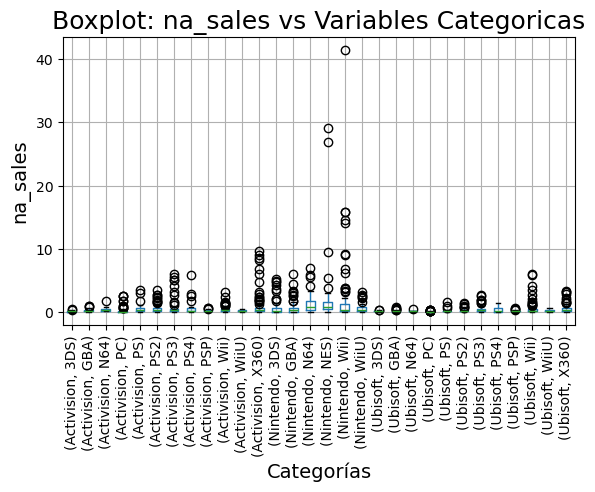

<Figure size 3000x1500 with 0 Axes>

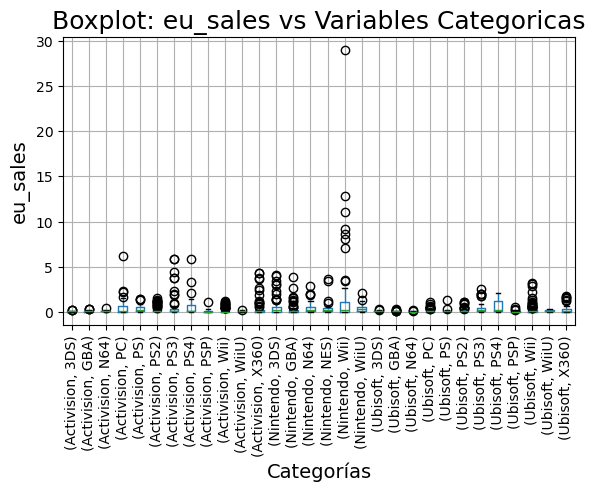

<Figure size 3000x1500 with 0 Axes>

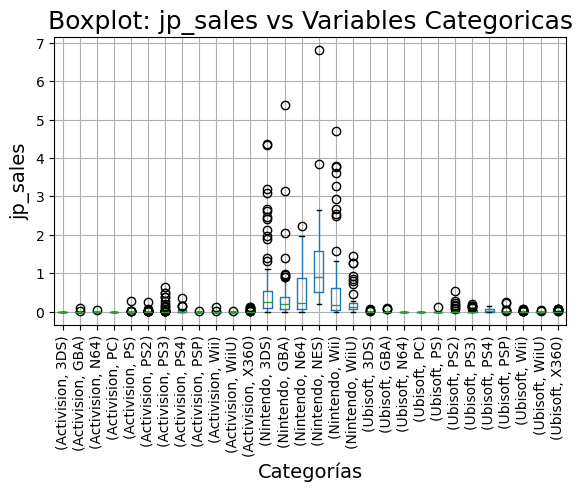

<Figure size 3000x1500 with 0 Axes>

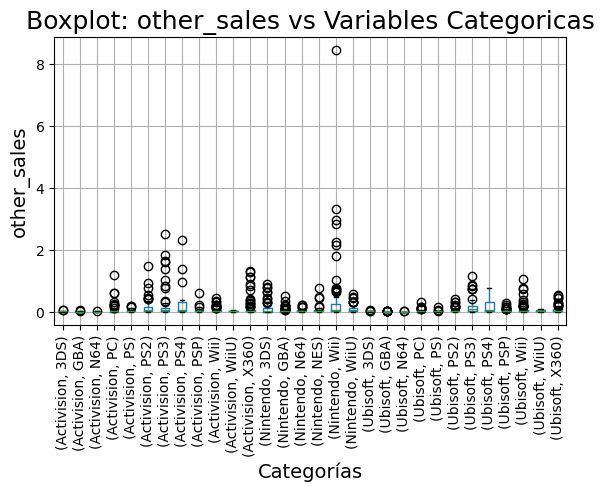

<Figure size 3000x1500 with 0 Axes>

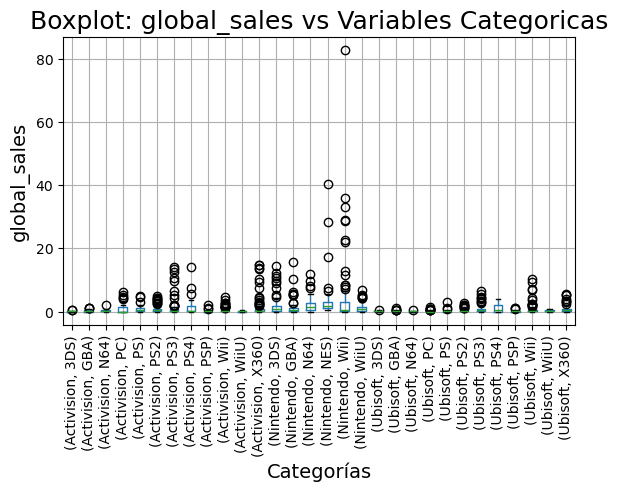

In [154]:
cat_cols_seleccionadas = ['publisher', 'platform',]

for num_col in num_cols:
    plt.figure(figsize=(30, 15))  
    
    # Crear el boxplot agrupando por las tres categorías
    df.boxplot(column=num_col, by=cat_cols_seleccionadas)
    
    # Personalizar gráfico
    plt.title(f"Boxplot: {num_col} vs Variables Categoricas", fontsize=18)
    plt.suptitle('')  # Eliminar título automático
    plt.xlabel('Categorías', fontsize=14)
    plt.ylabel(num_col, fontsize=14)
    
    plt.xticks(rotation=90, fontsize=10)  # Rotar a 90° y reducir tamaño
    plt.grid(True)
    
    # Ajustar automáticamente los márgenes para evitar superposición
    plt.subplots_adjust(bottom=0.3)  

    plt.show()

In [156]:
diccionario = {}
new_col = []
for i in num_cols:
    new_col.append(f"{i}_lower_bound")
    new_col.append(f"{i}_upper_bound")
    diccionario[i] = [
        ('lower_bound' , lambda x: x.quantile(.25) - 1.5 * (x.quantile(.75) - x.quantile(.25))),
        ('upper_bound', lambda x: x.quantile(.75) + 1.5 * (x.quantile(.75) - x.quantile(.25)))
    ]
    


In [157]:
new_col

['na_sales_lower_bound',
 'na_sales_upper_bound',
 'eu_sales_lower_bound',
 'eu_sales_upper_bound',
 'jp_sales_lower_bound',
 'jp_sales_upper_bound',
 'other_sales_lower_bound',
 'other_sales_upper_bound',
 'global_sales_lower_bound',
 'global_sales_upper_bound']

In [158]:
dfd = df.groupby( cat_cols, as_index = False).agg(
    diccionario
)

In [160]:
dfd

platform   publisher    na_sales                eu_sales              \
                        lower_bound upper_bound lower_bound upper_bound   
0       3DS  Activision    -0.12500     0.31500    -0.07750     0.14250   
1       3DS    Nintendo    -0.87500     1.46500    -0.70750     1.23250   
2       3DS     Ubisoft    -0.04500     0.23500    -0.06000     0.18000   
3       GBA  Activision    -0.34500     0.73500    -0.13000     0.27000   
4       GBA    Nintendo    -0.93750     1.56250    -0.28500     0.47500   
5       GBA     Ubisoft    -0.13500     0.30500    -0.05000     0.11000   
6       N64  Activision    -0.41000     1.03000    -0.12000     0.28000   
7       N64    Nintendo    -1.89000     3.91000    -0.74500     1.37500   
8       N64     Ubisoft    -0.03250     0.22750    -0.00500     0.05500   
9       NES    Nintendo    -1.23000     3.09000    -0.32000     0.80000   
10       PC  Activision    -0.26000     0.46000    -0.96500     1.63500   
11       PC     Ubisoft    -0.06000     0.10000    -0.16375     0.32625   
12       PS  Activision    -0.52125     1.26875    -0.46250     1.03750   
13       PS     Ubisoft    -0.09250     0.28750    -0.07875     0.21125   
14      PS2  Activision    -0.65750     1.36250    -0.21000     0.43000   
15      PS2     Ubisoft    -0.23875     0.59125    -0.11125     0.31875   
16      PS3  Activision    -0.27250     0.74750    -0.42375     0.78625   
17      PS3     Ubisoft    -0.39500     0.92500    -0.44000     0.92000   
18      PS4  Activision    -0.73500     1.46500    -0.97000     1.83000   
19      PS4     Ubisoft    -0.94500     1.59500    -1.67125     2.91875   
20      PSP  Activision    -0.15125     0.41875    -0.20625     0.34375   
21      PSP     Ubisoft    -0.07625     0.31375    -0.12375     0.20625   
22      Wii  Activision    -0.34250     0.91750    -0.21750     0.36250   
23      Wii    Nintendo    -1.53500     2.84500    -1.54000     2.62000   
24      Wii     Ubisoft    -0.35000     0.85000    -0.25500     0.42500   
25     WiiU  Activision    -0.20625     0.48375    -0.11250     0.24750   
26     WiiU    Nintendo    -0.68750     1.53250    -0.53750     1.16250   
27     WiiU     Ubisoft    -0.24750     0.57250    -0.23375     0.51625   
28     X360  Activision    -0.50125     1.12875    -0.29000     0.51000   
29     X360     Ubisoft    -0.65000     1.35000    -0.43750     0.78250   

      jp_sales             other_sales             global_sales              
   lower_bound upper_bound lower_bound upper_bound  lower_bound upper_bound  
0      0.00000     0.00000    -0.01000     0.03000     -0.15500     0.44500  
1     -0.52000     1.16000    -0.15875     0.27125     -2.27750     4.38250  
2      0.00000     0.00000    -0.00500     0.03500     -0.20000     0.60000  
3      0.00000     0.00000    -0.01500     0.02500     -0.49000     1.03000  
4     -0.39500     0.84500    -0.03750     0.06250     -1.20750     2.65250  
5      0.00000     0.00000     0.00000     0.00000     -0.23000     0.49000  
6      0.00000     0.00000    -0.01500     0.02500     -0.44500     1.27500  
7     -1.15625     2.09375    -0.06500     0.13500     -3.07125     6.25875  
8      0.00000     0.00000     0.00000     0.00000     -0.04875     0.30125  
9     -1.08000     3.16000    -0.04000     0.12000     -1.50000     6.02000  
10     0.00000     0.00000    -0.06000     0.10000     -2.00875     3.40125  
11     0.00000     0.00000    -0.04500     0.07500     -0.30375     0.58625  
12     0.00000     0.00000    -0.05875     0.15125     -1.22875     2.76125  
13     0.00000     0.00000    -0.00500     0.03500     -0.21625     0.59375  
14     0.00000     0.00000    -0.16500     0.35500     -0.85750     1.96250  
15     0.00000     0.00000    -0.05125     0.13875     -0.43000     1.15000  
16     0.00000     0.00000    -0.14500     0.29500     -0.70000     1.64000  
17    -0.06000     0.10000    -0.19500     0.40500     -1.07000     2.29000  
18    -0.07500     0.12500    -0.37500    

In [162]:
dfd.columns = cat_cols + new_col


In [163]:
df_merge = df.merge(
    dfd,
    on = cat_cols,
    how = 'inner'
)

In [165]:
for i in num_cols:
    df_merge = df_merge.loc[
        (df_merge[i] <= df_merge[f'{i}_upper_bound'])&(df_merge[i] >= df_merge[f'{i}_lower_bound']), :
        ]
    

In [166]:
df_merge

,platform,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,na_sales_lower_bound,na_sales_upper_bound,eu_sales_lower_bound,eu_sales_upper_bound,jp_sales_lower_bound,jp_sales_upper_bound,other_sales_lower_bound,other_sales_upper_bound,global_sales_lower_bound,global_sales_upper_bound
56,NES,Nintendo,2.97,0.69,1.81,0.11,5.58,-1.2300,3.0900,-0.32000,0.80000,-1.08000,3.16000,-0.04000,0.12000,-1.50000,6.02000
58,N64,Nintendo,2.95,0.60,1.97,0.04,5.55,-1.8900,3.9100,-0.74500,1.37500,-1.15625,2.09375,-0.06500,0.13500,-3.07125,6.25875
63,N64,Nintendo,3.18,1.24,0.94,0.09,5.45,-1.8900,3.9100,-0.74500,1.37500,-1.15625,2.09375,-0.06500,0.13500,-3.07125,6.25875
66,N64,Nintendo,3.33,0.79,1.09,0.06,5.27,-1.8900,3.9100,-0.74500,1.37500,-1.15625,2.09375,-0.06500,0.13500,-3.07125,6.25875
76,N64,Nintendo,2.91,0.99,0.89,0.10,4.88,-1.8900,3.9100,-0.74500,1.37500,-1.15625,2.09375,-0.06500,0.13500,-3.07125,6.25875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1724,PC,Activision,0.01,0.00,0.00,0.00,0.01,-0.2600,0.4600,-0.96500,1.63500,0.00000,0.00000,-0.06000,0.10000,-2.00875,3.40125
1725,PC,Activision,0.01,0.00,0.00,0.00,0.01,-0.2600,0.4600,-0.96500,1.63500,0.00000,0.00000,-0.06000,0.10000,-2.00875,3.40125
1726,3DS,Nintendo,0.00,0.00,0.01,0.00,0.01,-0.8750,1.4650,-0.70750,1.23250,-0.52000,1.16000,-0.15875,0.27125,-2.27750,4.38250
1727,PC,Ubisoft,0.01,0.00,0.00,0.00,0.01,-0.0600,0.1000,-0.16375,0.32625,0.00000,0.00000,-0.04500,0.07500,-0.30375,0.58625


In [168]:
prob_freq = df.groupby( cat_cols , as_index=False ).agg({
    "na_sales": ["count"]
})

prob_freq.columns = cat_cols + ["user"]

In [169]:
prob_freq

,platform,publisher,user
0,3DS,Activision,27
1,3DS,Nintendo,82
2,3DS,Ubisoft,21
3,GBA,Activision,49
4,GBA,Nintendo,91
5,GBA,Ubisoft,53
6,N64,Activision,13
7,N64,Nintendo,60
8,N64,Ubisoft,12
9,NES,Nintendo,45
